In [1]:
import itertools
from scipy.optimize import linprog

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lower_bounds = {'customer_care': np.array([12.9444, 0.007813, 2.475]),
                'distribution': np.array([0, 0, 3.07]),
                'cotton_production': np.array([290.0044531, 0, 9.38E-06]),
                'manufacturing': np.array([21.16504, 28.97, 0.1194])}

upper_bounds = {'customer_care': np.array([47.551, 0.039063, 6.2]),
               'distribution': np.array([0, 0, 6.5]),
                'cotton_production': np.array([660.0044531, 0, 0.000125]),
                'manufacturing': np.array([95.114973, 28.97, 1.7094])
               }


In [4]:
def scaling(input_lst, step):
    lower_bound = lower_bounds[step]
    upper_bound = upper_bounds[step]
    range_keys = (upper_bound - lower_bound) / 10
    diffs = input_lst - lower_bound
    score_lst = []
    for i in range(0, len(diffs)):
        for j in range(1, 11):
            if diffs[i] <= range_keys[i] * j:
                score_lst.append(j)
                break
    return score_lst

In [5]:
lower = 1/3 - 1/10
upper = 1/3 + 1/10

In [6]:
A = [[1, 1, 1]]
b = [1]
x_bounds = (lower, upper)
y_bounds = (lower, upper)
z_bounds = (lower, upper)

### Customer Care

In [7]:
washing_water = [12.9444, 17.4354, 22.1905, 35.3991, 47.551]
washing_co2 = [1.875, 2.16, 2.36, 2.64, 2.9]
detergent = [0.0078125, 0.0234375, 0.0390625]
dryer = [0.6, 0.7, 2.4, 3.3] 
possible_combos = list(map(list, list(itertools.product(washing_water, detergent, dryer))))
lst = []
for combo in possible_combos:
    combo[2] += washing_co2[washing_water.index(combo[0])]

In [8]:
scores = []
weights = []
for combo in possible_combos:
    c = scaling(combo, 'customer_care')
    res = linprog(c, A_eq = A, b_eq = b, bounds=(x_bounds, y_bounds, z_bounds))
    scores.append(res.fun)
    weights.append(res.x)

In [9]:
machine_cond = ['New Machine Medium Heat', '5 Yrs Old Machine Medium Heat',
                '10 Yrs Old Machine Medium Heat', '20 Yrs Old Machine Medium Heat',
                '30 Yrs Old Machine Medium Heat']
load_cond = ['Small Load', 'Large Load', 'Full Load']
dryer_cond = ['30 Celsius', '40 Celsius, dried on a line', '40 Celsius, tumble dried',
             '60 Celsius, dries in combined washer/drier']
conds = [', '.join(lst) for lst in list(map(list, list(itertools.product(machine_cond, load_cond, dryer_cond))))]

,Procedure,Data,Score,Weights
0,"New Machine Medium Heat, Small Load, 30 Celsius","[12.9444, 0.0078125, 2.475]",1.000000,"[0.2333333333333333, 0.3333333333333333, 0.433..."
1,"New Machine Medium Heat, Small Load, 40 Celsiu...","[12.9444, 0.0078125, 2.575]",1.000000,"[0.2333333333333333, 0.3333333333333333, 0.433..."
12,"5 Yrs Old Machine Medium Heat, Small Load, 30 ...","[17.4354, 0.0078125, 2.7600000000000002]",1.233333,"[0.2333333333333333, 0.3333333333333333, 0.433..."
13,"5 Yrs Old Machine Medium Heat, Small Load, 40 ...","[17.4354, 0.0078125, 2.8600000000000003]",1.566667,"[0.2333333333333333, 0.43333333333333335, 0.33..."
25,"10 Yrs Old Machine Medium Heat, Small Load, 40...","[22.1905, 0.0078125, 3.0599999999999996]",1.800000,"[0.2333333333333333, 0.43333333333333335, 0.33..."


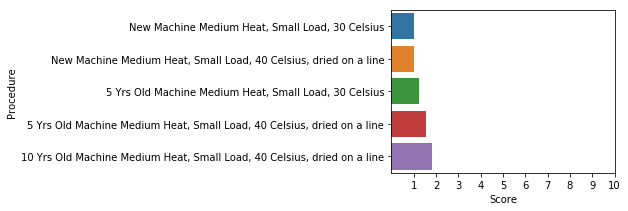

In [10]:
output = pd.DataFrame({'Procedure': conds, 'Data': possible_combos, 'Score': scores, 'Weights': weights}).sort_values('Score')
display(output.head())
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x = 'Score', y = 'Procedure', data = output.head(), orient = 'h')
plt.xticks(np.arange(1, 11))
plt.show()

,Procedure,Data,Score,Weights
46,"20 Yrs Old Machine Medium Heat, Full Load, 40 ...","[35.3991, 0.0390625, 5.04]",7.700000,"[0.3333333333333333, 0.2333333333333333, 0.433..."
55,"30 Yrs Old Machine Medium Heat, Large Load, 60...","[47.551, 0.0234375, 6.199999999999999]",7.833333,"[0.2333333333333333, 0.43333333333333335, 0.33..."
47,"20 Yrs Old Machine Medium Heat, Full Load, 60 ...","[35.3991, 0.0390625, 5.9399999999999995]",8.700000,"[0.43333333333333335, 0.2333333333333333, 0.33..."
58,"30 Yrs Old Machine Medium Heat, Full Load, 40 ...","[47.551, 0.0390625, 5.3]",9.133333,"[0.2333333333333333, 0.3333333333333333, 0.433..."
59,"30 Yrs Old Machine Medium Heat, Full Load, 60 ...","[47.551, 0.0390625, 6.199999999999999]",10.000000,"[0.2333333333333333, 0.3333333333333333, 0.433..."


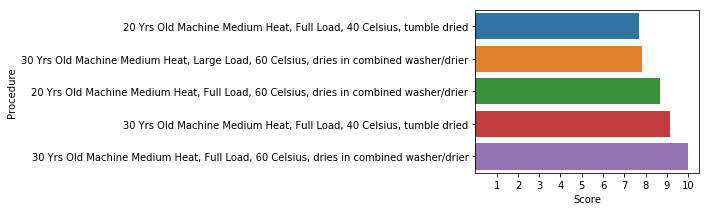

In [11]:
display(output.tail())
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x = 'Score', y = 'Procedure', data = output.tail(), orient = 'h')
plt.xticks(np.arange(1, 11))
plt.show()

### Distribution

In [12]:
possible_combos = [[0, 0, 3.07], [0, 0, 6.5]]
scores = []
weights = []
for combo in possible_combos:
    c = scaling(combo, 'distribution')
    res = linprog(c, A_eq = A, b_eq = b, bounds=(x_bounds, y_bounds, z_bounds))
    scores.append(res.fun)
    weights.append(res.x)

,Shipping Methods,Data,Score,Weights
0,Asia to Europe by ship,"[0, 0, 3.07]",1.0,"[0.2333333333333333, 0.3333333333333333, 0.433..."
1,Asia to Europe by plane,"[0, 0, 6.5]",3.1,"[0.3333333333333333, 0.43333333333333335, 0.23..."


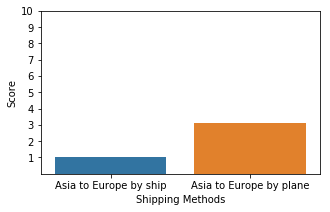

In [13]:
output = pd.DataFrame({'Shipping Methods': ['Asia to Europe by ship', 'Asia to Europe by plane'],
                       'Data': possible_combos, 'Score': scores, 'Weights': weights})
display(output)
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x = 'Shipping Methods', y = 'Score', data = output)
plt.yticks(np.arange(1, 11))
plt.show()

### Cotton Production

In [14]:
cotton_water = [660.004453, 290.004453]
carbon = [0]
pest_chemical = [1.56E-05, 1.95E-05, 1.17E-05, 9.38E-05,
                 6.25E-05, 0.000125, 4.69E-05, 3.13E-05, 4.69E-05, 3.91E-05, 9.38E-06]
possible_combos = list(map(list, list(itertools.product(cotton_water, carbon, pest_chemical))))

In [15]:
scores = []
weights = []
for combo in possible_combos:
    c = scaling(combo, 'cotton_production')
    res = linprog(c, A_eq = A, b_eq = b, bounds=(x_bounds, y_bounds, z_bounds))
    scores.append(res.fun)
    weights.append(res.x)

In [16]:
cotton_type = ['Organic', 'Conventional']
pesticide_brand = ['0.38 ounce Imidacloprid', '0.38 ounce Centric', '0.38 ounce Transform',
                   '0.38 ounce Orthene', '0.38 ounce Bidrin', '0.38 ounce Vydate CL-V',
                   '0.38 ounce Diamond', '0.38 ounce Acephate', '0.38 ounce Mixture of acephate and imidacloprid',
                   '0.38 ounce Aphids', '0.38 ounce Intruder']
conds = [', '.join(lst) for lst in list(map(list, list(itertools.product(cotton_type, pesticide_brand))))]

,Procedure,Data,Score,Weights
21,"Conventional, 0.38 ounce Intruder","[290.004453, 0, 9.38e-06]",1.000000,"[0.2333333333333333, 0.3333333333333333, 0.433..."
13,"Conventional, 0.38 ounce Transform","[290.004453, 0, 1.17e-05]",1.000000,"[0.2333333333333333, 0.3333333333333333, 0.433..."
12,"Conventional, 0.38 ounce Centric","[290.004453, 0, 1.95e-05]",1.000000,"[0.2333333333333333, 0.3333333333333333, 0.433..."
11,"Conventional, 0.38 ounce Imidacloprid","[290.004453, 0, 1.56e-05]",1.000000,"[0.2333333333333333, 0.3333333333333333, 0.433..."
18,"Conventional, 0.38 ounce Acephate","[290.004453, 0, 3.13e-05]",1.233333,"[0.3333333333333333, 0.43333333333333335, 0.23..."


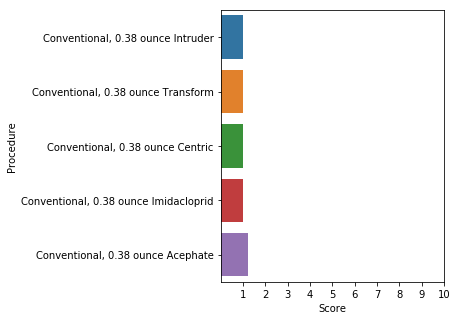

In [17]:
output = pd.DataFrame({'Procedure': conds, 'Data': possible_combos, 
                       'Score': scores, 'Weights': weights}).sort_values('Score')
display(output.head())
fig, ax = plt.subplots(figsize=(4, 5))
sns.barplot(x = 'Score', y = 'Procedure', data = output.head(), orient = 'h')
plt.xticks(np.arange(1, 11))
plt.show()

,Procedure,Data,Score,Weights
8,"Organic, 0.38 ounce Mixture of acephate and im...","[660.004453, 0, 4.69e-05]",4.100000,"[0.2333333333333333, 0.43333333333333335, 0.33..."
6,"Organic, 0.38 ounce Diamond","[660.004453, 0, 4.69e-05]",4.100000,"[0.2333333333333333, 0.43333333333333335, 0.33..."
4,"Organic, 0.38 ounce Bidrin","[660.004453, 0, 6.25e-05]",4.433333,"[0.2333333333333333, 0.43333333333333335, 0.33..."
3,"Organic, 0.38 ounce Orthene","[660.004453, 0, 9.38e-05]",5.433333,"[0.2333333333333333, 0.43333333333333335, 0.33..."
5,"Organic, 0.38 ounce Vydate CL-V","[660.004453, 0, 0.000125]",6.100000,"[0.2333333333333333, 0.43333333333333335, 0.33..."


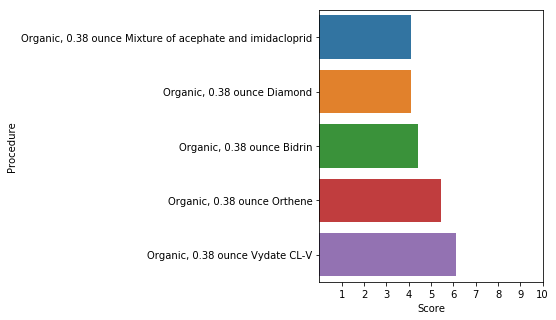

In [18]:
display(output.tail())
fig, ax = plt.subplots(figsize=(4, 5))
sns.barplot(x = 'Score', y = 'Procedure', data = output.tail(), orient = 'h')
plt.xticks(np.arange(1, 11))
plt.show()

### Manufacturing

In [19]:
water = [78.628172]
dye_water = [6.6079, 9.2511, 7.9295, 3.9648, 11.5639, 9.9119, 6.6079, 0.6608, 7.2687,
            6.6079, 1.9824]
treatment_water = [0.793, 1.685, 4.9229, 0.0396]
co2 = [28.97]
dyeing_chemical = [0.19932, 0.12200156, 0.1208881, 1.7094, 0.2784,
       0.16682186, 0.13628218]

In [20]:
water_combos = np.sum(list(map(list, list(itertools.product(dye_water, treatment_water)))), axis = 1)
water_combos = np.array(water_combos) + water

In [21]:
possible_combos = list(map(list, list(itertools.product(water_combos, co2, dyeing_chemical))))

In [22]:
scores = []
weights = []
for combo in possible_combos:
    c = scaling(combo, 'manufacturing')
    res = linprog(c, A_eq = A, b_eq = b, bounds=(x_bounds, y_bounds, z_bounds))
    scores.append(res.fun)
    weights.append(res.x)

In [23]:
dye_procedure = ['Weaving, Knitting, Beam Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Beck Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Jet Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Jig Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Paddle Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Skein Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Stock Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Pad-batch Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Package Dyeing, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Continuous bleaching, Printing, Print afterwashing, Dye finishing',
                 'Weaving, Knitting, Indigo dyeing, Printing, Print afterwashing, Dye finishing']
treatment_procedure = ['Desizing Cotton Fibres', 'Scouring Cotton Fibres', 'Bleaching Cotton Fibres',
                    'Mercerizing Cotton Fibres']
water_procedure = list(map(list, list(itertools.product(dye_procedure, treatment_procedure))))
water_procedure = [', '.join(lst) for lst in water_procedure]

In [24]:
chemicals = ['Salt', 'Caustic potash', 'Fiber-reactive dye powder', 'Zinc', 'Cupper', 'Petroleum', 'Others']

In [25]:
conds = [', '.join(lst) for lst in list(map(list, list(itertools.product(water_procedure, chemicals))))]

,Procedure,Data,Score,Weights
200,"Weaving, Knitting, Pad-batch Dyeing, Printing,...","[80.08197200000001, 28.97, 0.2784]",2.633333,"[0.2333333333333333, 0.3333333333333333, 0.433..."
198,"Weaving, Knitting, Pad-batch Dyeing, Printing,...","[80.08197200000001, 28.97, 0.1208881]",2.633333,"[0.2333333333333333, 0.3333333333333333, 0.433..."
197,"Weaving, Knitting, Pad-batch Dyeing, Printing,...","[80.08197200000001, 28.97, 0.12200156]",2.633333,"[0.2333333333333333, 0.3333333333333333, 0.433..."
196,"Weaving, Knitting, Pad-batch Dyeing, Printing,...","[80.08197200000001, 28.97, 0.19932]",2.633333,"[0.2333333333333333, 0.3333333333333333, 0.433..."
201,"Weaving, Knitting, Pad-batch Dyeing, Printing,...","[80.08197200000001, 28.97, 0.16682186]",2.633333,"[0.2333333333333333, 0.3333333333333333, 0.433..."


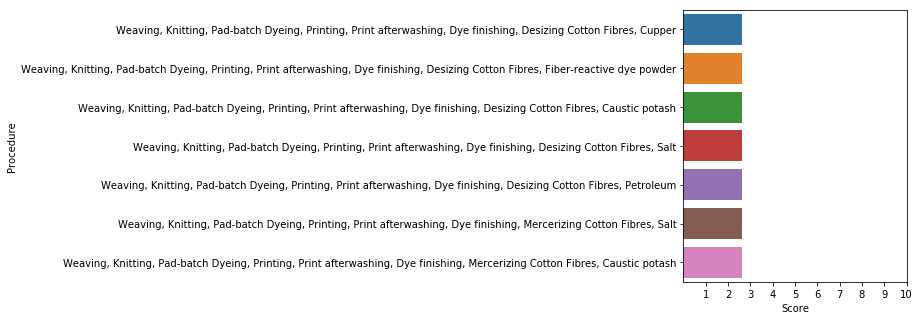

In [26]:
output = pd.DataFrame({'Procedure': conds, 'Data': possible_combos, 
                       'Score': scores, 'Weights': weights}).sort_values('Score')
display(output.head())
fig, ax = plt.subplots(figsize=(4, 5))
sns.barplot(x = 'Score', y = 'Procedure', data = output.head(7), orient = 'h')
plt.xticks(np.arange(1, 11))
plt.show()

,Procedure,Data,Score,Weights
150,"Weaving, Knitting, Skein Dyeing, Printing, Pri...","[90.22507200000001, 28.97, 1.7094]",6.1,"[0.2333333333333333, 0.43333333333333335, 0.33..."
241,"Weaving, Knitting, Package Dyeing, Printing, P...","[90.819772, 28.97, 1.7094]",6.1,"[0.2333333333333333, 0.43333333333333335, 0.33..."
157,"Weaving, Knitting, Skein Dyeing, Printing, Pri...","[93.46297200000001, 28.97, 1.7094]",6.1,"[0.2333333333333333, 0.43333333333333335, 0.33..."
122,"Weaving, Knitting, Paddle Dyeing, Printing, Pr...","[91.87707200000001, 28.97, 1.7094]",6.1,"[0.2333333333333333, 0.43333333333333335, 0.33..."
73,"Weaving, Knitting, Jet Dyeing, Printing, Print...","[91.48057200000001, 28.97, 1.7094]",6.1,"[0.2333333333333333, 0.43333333333333335, 0.33..."


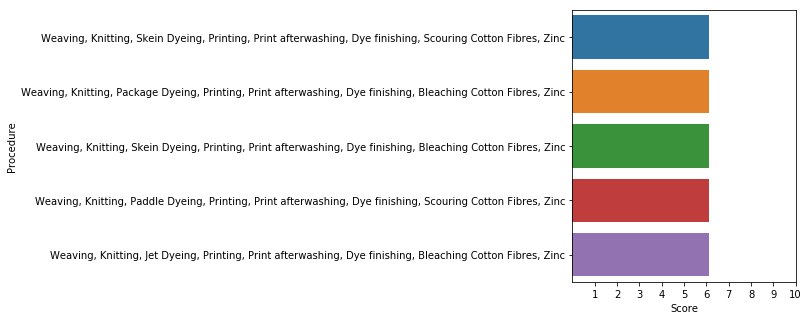

In [27]:
display(output.tail())
fig, ax = plt.subplots(figsize=(4, 5))
sns.barplot(x = 'Score', y = 'Procedure', data = output.tail(), orient = 'h')
plt.xticks(np.arange(1, 11))
plt.show()